In [ ]:
# Descrição: Detecção de Spam

# importando bibliotecas

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
# Upando o banco de dados

from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
# Lendo o arquivo csv

df = pd.read_csv('spam.csv')

df.head(5)

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Printando o shape do spam

df.shape

(5572, 2)

In [ ]:
df.columns

Index(['Label', 'EmailText'], dtype='object')

In [ ]:
# Checando se tem duplicatas e as removendo

df.drop_duplicates(inplace = True)

In [ ]:
# Novo formato após remover os sms duplicados

df.shape

(5169, 2)

In [ ]:
# -------------------------------- ANALISE DOS DADOS -------------------------------------------------

import matplotlib.pyplot as plt

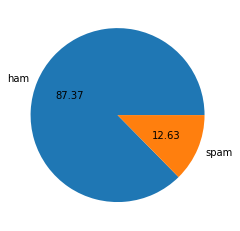

In [ ]:
# Gráfico da porcentagem de Ham e Spam

plt.pie(df['Label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Baixando as stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Atualizando o Banco para conter quantidade de caracteres por e-mail

df['num_characters'] = df['EmailText'].apply(len)
df.head()

,Label,EmailText,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Atualizando o Banco para conter quantidade de palavras por e-mail

df['num_words'] = df['EmailText'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Label,EmailText,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Atualizando o Banco para conter quantidade de sentenças por e-mail

df['num_sentences'] = df['EmailText'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Label,EmailText,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Informações de todos os dados do Banco

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.200813,18.454246,1.948152
std,58.387510,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# Informações dos e-mail Ham

df[df['Label'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.591231,17.120903,1.799601
std,56.406061,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# Informações dos e-mail Spam

df[df['Label'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.742726,27.675345,2.975498
std,30.419480,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,8.000000


In [ ]:
import seaborn as sns

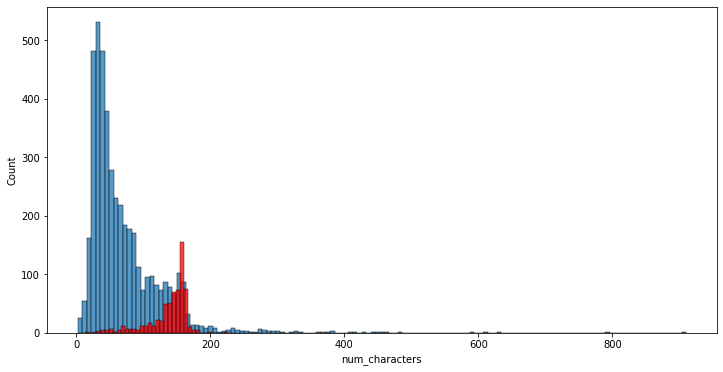

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 'ham']['num_characters'])
sns.histplot(df[df['Label'] == 'spam']['num_characters'],color='red')

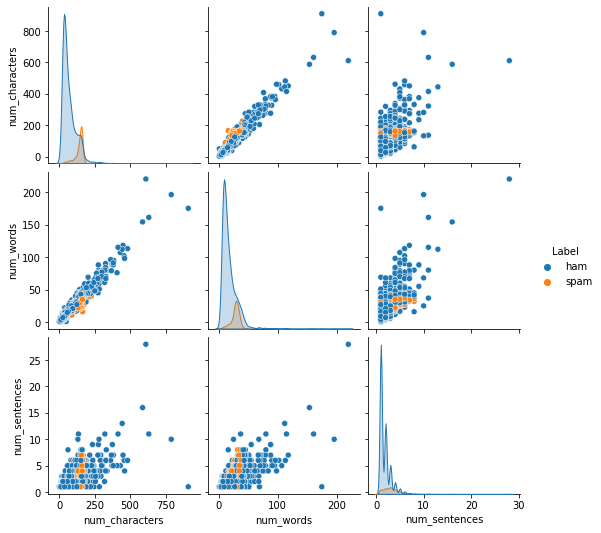

In [ ]:
sns.pairplot(df,hue='Label')

In [ ]:
# codigo pra processar mensagens

# 1 - remover as pontuações
# 2 - remover as "stopwords"
# 3 - retornar uma lista de texto limpo

def processar(text):
  #1
  pontuacao = [ char for char in text if char not in string.punctuation]
  pontuacao = ''.join(pontuacao)

  #2
  stopw = [ word for word in pontuacao.split() if word.lower() not in stopwords.words('english')]

  #3
  return stopw


In [ ]:
# Mostrar a tokenização

df['EmailText'].head().apply(processar)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: EmailText, dtype: object

In [ ]:
# Convertendo o texto para uma matriz

from sklearn.feature_extraction.text import CountVectorizer

mensagens_v = CountVectorizer(analyzer=processar).fit_transform(df['EmailText'])

In [ ]:
# novo formato

mensagens_v.shape

(5169, 11304)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

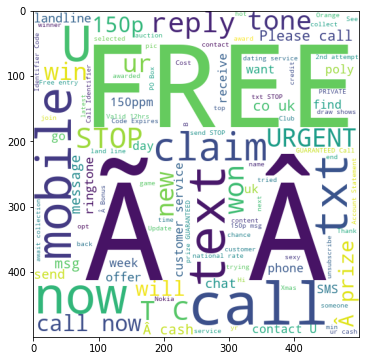

In [ ]:
# Palavras mais usadas nos spams
spam_wc = wc.generate(df[df['Label'] == 'spam']['EmailText'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
# funções que serão usadas para ver os valores dos folders
from sklearn.metrics import f1_score

def predict(mdl, x_test):
  return mdl.predict(x_test)

def obter_score(mdl, x_train, x_test, y_train, y_test):
    mdl.fit(x_train, y_train)
    return float(format(mdl.score(x_test, y_test), '.8f'))

def treinar(res_dt, mdl_dt, x_train, x_test, y_train, y_test):
    return np.append(res_dt, obter_score(mdl_dt, x_train, x_test, y_train, y_test))

def obter_f1(pred_dt, y_test):
  return (metrics.f1_score(y_test, pred_dt, average ="binary", pos_label = 'spam'))

def f1_measure(f1_dt, pred_dt, y_test):
  return np.append(f1_dt, obter_f1(pred_dt, y_test))

def media(f1_dt):
  soma = 0
  for i in range (0,10):
    soma += f1_dt[i]
  return (soma/10)

In [ ]:
# importando classificadores

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



mdl_nb =  MultinomialNB()
mdl_knn = KNeighborsClassifier()
mdl_rf = RandomForestClassifier()
mdl_svm = SVC()

In [ ]:
# Usando k-fold
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Criando os Arrays das Acurácias
res_nb = np.array([])
res_knn = np.array([])
res_rf = np.array([])
res_svm = np.array([])

# Criando os Arrays dos f1_scores
f1_nb = np.array([])
f1_knn = np.array([])
f1_rf = np.array([])
f1_svm = np.array([])

y = df['Label'].values
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(mensagens_v, y)
for train_index, test_index in kf.split(mensagens_v, y):
  x_train, x_test = mensagens_v[train_index], mensagens_v[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Naive-Bayes
  res_nb = (treinar(res_nb, mdl_nb, x_train, x_test, y_train, y_test))
  pred_nb = predict(mdl_nb, x_test)
  f1_nb = (f1_measure(f1_nb, pred_nb, y_test))

  # KNN
  res_knn = (treinar(res_knn, mdl_knn, x_train, x_test, y_train, y_test))
  pred_knn = predict(mdl_knn, x_test)
  f1_knn = (f1_measure(f1_knn, pred_knn, y_test))

  # Random Forest
  res_rf = (treinar(res_rf, mdl_rf, x_train, x_test, y_train, y_test))
  pred_rf = predict(mdl_rf, x_test)
  f1_rf = (f1_measure(f1_rf, pred_rf, y_test))

  #Svm
  res_svm = (treinar(res_svm, mdl_svm, x_train, x_test, y_train, y_test))
  pred_svm = predict(mdl_svm, x_test)
  f1_svm = (f1_measure(f1_svm, pred_svm, y_test))




In [ ]:
print(f1_nb, '- Naive-Bayes')
print()
print(f1_knn, '- KNN')
print()
print(f1_rf, '- Random Forest')
print()
print(f1_svm, '- SVM')

[0.88549618 0.86363636 0.86227545 0.86330935 0.84       0.83464567
 0.85714286 0.90410959 0.86896552 0.88888889] - Naive-Bayes

[0.53012048 0.41025641 0.39175258 0.49411765 0.25974026 0.38235294
 0.45945946 0.39534884 0.4        0.36363636] - KNN

[0.88073394 0.80373832 0.89361702 0.83636364 0.85470085 0.86597938
 0.91428571 0.85       0.80701754 0.875     ] - Random Forest

[0.82692308 0.76       0.84444444 0.75       0.7706422  0.82978723
 0.91428571 0.78947368 0.8173913  0.81967213] - SVM


In [ ]:
# teste de wilcoxon
# KNN,SVM,NB,RF
import scipy.stats

#Cálculo do P-valor a partir dos arrays de F1_SCORE.

# KNN e SVM
test_knn_svm = scipy.stats.wilcoxon(f1_knn,f1_svm)
p_value_knn_svm = (test_knn_svm.pvalue)
print("P-value entre Knn e SVM: %.8f" % (p_value_knn_svm))

# KNN e Naive-Bayes
test_knn_nb = scipy.stats.wilcoxon(f1_knn,f1_nb)
p_value_knn_nb = (test_knn_nb.pvalue)
print("P-value entre KNN e NB: %.8f" % (p_value_knn_nb))

# KNN e Random Forest
test_knn_rf = scipy.stats.wilcoxon(f1_knn,f1_rf)
p_value_knn_rf = (test_knn_rf.pvalue)
print("P-value entre KNN e RF: %.8f" % (p_value_knn_rf))

# Random Forest e SVM
test_rf_svm = scipy.stats.wilcoxon(f1_rf,f1_svm)
p_value_rf_svm = (test_rf_svm.pvalue)
print("P-value entre RF e SVM: %.8f" % (p_value_rf_svm))

# Random Forest e Naive-Bayes
test_rf_nb = scipy.stats.wilcoxon(f1_rf,f1_nb)
p_value_rf_nb = (test_rf_nb.pvalue)
print("P-value entre RF e NB: %.8f" % (p_value_rf_nb))

# SVM e Naive Bayes
test_svm_nb = scipy.stats.wilcoxon(f1_svm,f1_nb)
p_value_svm_nb = (test_svm_nb.pvalue)
print("P-value entre SVM e NB: %.8f" % (p_value_svm_nb))

P-value entre Knn e SVM: 0.00195312
P-value entre KNN e NB: 0.00195312
P-value entre KNN e RF: 0.00195312
P-value entre RF e SVM: 0.01086222
P-value entre RF e NB: 0.62500000
P-value entre SVM e NB: 0.01367188


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [ ]:
# A partir dos p-valores, podemos ver que existe uma diferença enorme entre o KNN e os outros classificadores, e uma diferença menor entre os demais,
# a maior semelhança está entre o Random Forest e o Naive-Bayes, sendo necessário o uso da média dos f1_scores dos mesmos para "ranquear" qual o me-
# lhor classificador. Abaixo está as médias dos classificadores

In [ ]:
# Media dos F1_Scores dos Classificadores

# KNN
med_knn = media(f1_knn)
print("Media KNN: %.8f " % med_knn)

# Naive-Bayes
med_nb = media(f1_nb)
print("Media Naive-Bayes: %.8f " % med_nb)

# Random Forest
med_rf = media(f1_rf)
print("Media Random Forest: %.8f " % med_rf)

# SVM
med_svm = media(f1_svm)
print("Media SVM: %.8f " % med_svm)


Media KNN: 0.40867850 
Media Naive-Bayes: 0.86684699 
Media Random Forest: 0.85814364 
Media SVM: 0.81226198 


In [ ]:
# Podemos concluir, a partir do p-valor e das médias que o classificador mais adequado é o Naive-Bayes, e o menos adequado é o KNN.